<a href="https://colab.research.google.com/github/JoseConder/DS_proyecto3/blob/main/Parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

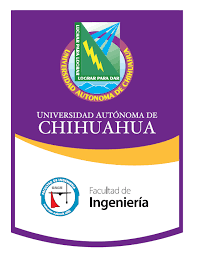

Universidad Autónoma de Chihuahua - Facultad de Ingenieríá

Data Science

Neural Networks

José Eduardo Conde Hernández 299506

Docente: Jesús Roberto López Santillan

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, [2, 3]]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


In [ ]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_train_full.shape
X_train_full.dtype

x_valid, x_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
verdad = model.get_layer(hidden1.name) is hidden1
print(verdad)
weights, biases = hidden1.get_weights()
print(weights)
weights.shape
print(biases)
biases.shape

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
dense
True
[[ 0.01237735 -0.01328315 -0.00523812 ... -0.05335061  0.04631359
   0.06959791]
 [ 0.06561074 -0.02831792 -0.01298193 ... -0.07206949  0.00679769
  -0.00613015]
 [-0.01431157  0.04909451  0.0440288  ... -0.04028827  0.04881475
   0.04654273]
 ...
 [-0.06703488 -0.01690462  0.03205095 ... -0.01484893  0.06333368
   0.02000482]
 [ 0.02693915 -0.02209519  0.00884039 ...  0.01257262 -0.02711107
  -0.05892845]
 [-0.07050408 -0.05223722 -0.05378387 ...  0.0620385   0.07149465
  -0.06554483]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6884 - loss: 0.9780 - val_accuracy: 0.8264 - val_loss: 0.5100
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8263 - loss: 0.5012 - val_accuracy: 0.8470 - val_loss: 0.4402
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8426 - loss: 0.4532 - val_accuracy: 0.8510 - val_loss: 0.4189
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8541 - loss: 0.4220 - val_accuracy: 0.8572 - val_loss: 0.4001
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8616 - loss: 0.3972 - val_accuracy: 0.8686 - val_loss: 0.3869
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8687 - loss: 0.3777 - val_accuracy: 0.8680 - val_loss: 0.3708
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8687 - loss: 0.3718 - val_accuracy: 0.8714 - val_loss: 0.3682
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8750 - loss: 0.351

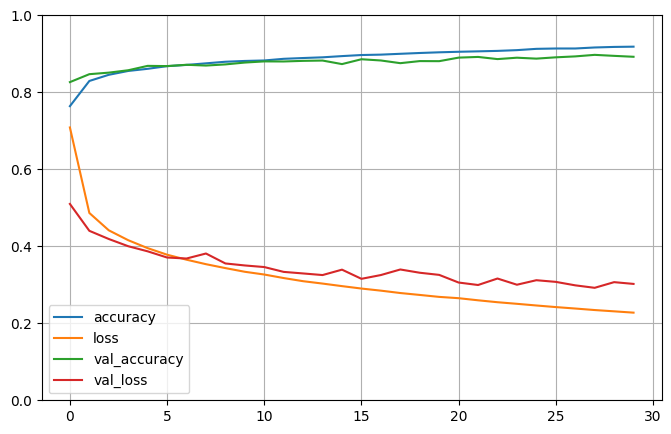

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(x_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2966


[0.30225223302841187, 0.8921999931335449]

In [ ]:
x_new = x_valid[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.59, 0.02, 0.05, 0.17, 0.03, 0.  , 0.14, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np

y_pred = model.predict(x_new)
y_pred = np.argmax(y_proba, axis=-1)

print(y_pred)

np.array(class_names)[y_pred]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[9 0 0]


array(['Ankle boot', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import numpy as np

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5714 - val_loss: 0.5321
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4581 - val_loss: 0.4572
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4202 - val_loss: 0.4360
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3975 - val_loss: 0.4788
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4132 - val_loss: 0.4150
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3910 - val_loss: 0.4267
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3822 - val_loss: 0.4293
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3957 - val_loss: 0.4012
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3629 - val_loss: 0.4999
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3716 - val_loss: 0.3880
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3638 - val_loss: 0.3959
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [ ]:
print(y_pred)
print(mse_test)
print("0")
type(y_pred)
print("1")
type(mse_test)

[[1.8210527]
 [1.5932093]
 [3.5943184]]
0.3593047261238098
0
1


float

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model(learning_rate=3e-3))
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.6580 - val_loss: 2.4463
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7200 - val_loss: 1.4126
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6948 - val_loss: 1.1199
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5471 - val_loss: 0.9271
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5293 - val_loss: 0.6152
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4934 - val_loss: 0.5669
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4804 - val_loss: 0.5263
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4433 - val_loss: 0.5046
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4345 - val_loss: 0.5308
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4349 - val_loss: 0.4674
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4279 - val_loss: 0.4829
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print(y_pred)
print(mse_test)
type(y_pred)
type(mse_test)

[2.1081457 3.2199876 1.7698591]
0.7402474696957021


float

In [ ]:
import numpy as np
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from tensorflow import keras

# Define la función de construcción del modelo
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=learning_rate))
    return model

# Define el espacio de búsqueda incluyendo el learning rate
param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100).tolist(),
    "model__learning_rate": reciprocal(3e-4, 3e-2)  # valores entre 0.0003 y 0.03
}

# Crea el KerasRegressor y el RandomizedSearchCV
keras_reg = KerasRegressor(model=build_model)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

# Entrena el modelo
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Resultados
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2880 - val_loss: 4.0633
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7089 - val_loss: 2.9513
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7451 - val_loss: 2.1675
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0302 - val_loss: 1.6111
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4990 - val_loss: 1.2258
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1635 - val_loss: 0.9647
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8951 - val_loss: 0.7953
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7567 - val_loss: 0.6934
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6541 - val_loss: 0.6332
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6136 - val_loss: 0.5984
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5647 - val_loss: 0.5786
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7762 - val_loss: 8.3254
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5605 - val_loss: 6.4038
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9137 - val_loss: 4.9462
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0973 - val_loss: 3.9121
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3859 - val_loss: 3.0799
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6668 - val_loss: 2.5039
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6597 - val_loss: 2.0778
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8474 - val_loss: 1.7619
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9438 - val_loss: 1.5211
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0833 - val_loss: 1.3264
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3734 - val_loss: 1.1744
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1291 - val_loss: 8.2844
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8701 - val_loss: 5.6511
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7242 - val_loss: 3.6355
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0122 - val_loss: 2.2442
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5466 - val_loss: 1.3946
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1614 - val_loss: 1.0056
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8902 - val_loss: 0.9678
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7764 - val_loss: 1.1369
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6831 - val_loss: 1.3755
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6049 - val_loss: 1.6299
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5655 - val_loss: 1.9093
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9719 - val_loss: 0.6330
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4046 - val_loss: 0.4190
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3579 - val_loss: 0.3515
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3539 - val_loss: 0.4909
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4172 - val_loss: 0.3927
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3419 - val_loss: 0.3339
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3181 - val_loss: 0.3520
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3392 - val_loss: 0.3493
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3024 - val_loss: 0.4343
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3141 - val_loss: 0.4038
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3346 - val_loss: 0.3558
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9315 - val_loss: 0.4947
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3702 - val_loss: 0.4452
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3662 - val_loss: 0.4112
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3329 - val_loss: 0.3646
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3141 - val_loss: 0.4126
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2994 - val_loss: 0.3420
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3197 - val_loss: 0.3254
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3067 - val_loss: 0.3211
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2799 - val_loss: 0.3593
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2887 - val_loss: 0.3292
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2891 - val_loss: 0.3180
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8215 - val_loss: 1.0937
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3956 - val_loss: 0.4214
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3689 - val_loss: 0.8433
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3690 - val_loss: 5.4079
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3644 - val_loss: 0.3800
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3381 - val_loss: 0.4258
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3331 - val_loss: 0.5250
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3205 - val_loss: 0.3665
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3001 - val_loss: 0.5571
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3206 - val_loss: 0.3445
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3231 - val_loss: 0.3581
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.7893 - val_loss: 0.5502
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4890 - val_loss: 0.7472
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5245 - val_loss: 0.4725
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3755 - val_loss: 0.4313
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3710 - val_loss: 0.4260
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3540 - val_loss: 0.3629
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3358 - val_loss: 0.3435
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3170 - val_loss: 0.3592
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3269 - val_loss: 0.7709
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3697 - val_loss: 0.4864
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2996 - val_loss: 0.3957
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7639 - val_loss: 0.7563
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4514 - val_loss: 0.7798
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3992 - val_loss: 0.5328
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3977 - val_loss: 0.4839
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3508 - val_loss: 0.3721
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3379 - val_loss: 0.4684
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3191 - val_loss: 0.4043
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3377 - val_loss: 0.4038
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3171 - val_loss: 0.3438
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3122 - val_loss: 0.5219
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2935 - val_loss: 0.4034
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7688 - val_loss: 0.6826
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4565 - val_loss: 0.4380
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3806 - val_loss: 0.4093
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3770 - val_loss: 0.3825
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3751 - val_loss: 0.4070
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3319 - val_loss: 0.4841
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3261 - val_loss: 0.4739
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3478 - val_loss: 0.3743
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3270 - val_loss: 0.4432
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2973 - val_loss: 0.4965
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2979 - val_loss: 0.4676
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1475 - val_loss: 3.4566
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7048 - val_loss: 1.6714
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3276 - val_loss: 0.9606
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8228 - val_loss: 0.7009
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6343 - val_loss: 0.6118
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5719 - val_loss: 0.5771
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5419 - val_loss: 0.5614
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5341 - val_loss: 0.5705
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5559 - val_loss: 0.5601
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5347 - val_loss: 0.5429
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5359 - val_loss: 0.5440
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.9732 - val_loss: 3.4077
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5194 - val_loss: 1.6671
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4815 - val_loss: 0.9036
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7748 - val_loss: 0.6619
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5810 - val_loss: 0.5886
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5730 - val_loss: 0.5761
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5583 - val_loss: 0.5649
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5221 - val_loss: 0.5631
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5621 - val_loss: 0.5575
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5248 - val_loss: 0.5545
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5016 - val_loss: 0.5553
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6458 - val_loss: 7.8652
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3625 - val_loss: 6.3137
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1685 - val_loss: 5.6230
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7150 - val_loss: 5.2406
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5643 - val_loss: 5.0837
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5288 - val_loss: 4.8226
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5304 - val_loss: 4.5346
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5253 - val_loss: 4.4048
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5020 - val_loss: 4.2596
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5246 - val_loss: 4.1171
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5083 - val_loss: 4.0559
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.2578 - val_loss: 6.2573
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0662 - val_loss: 5.1450
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0955 - val_loss: 4.2694
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5340 - val_loss: 3.5569
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8977 - val_loss: 2.9786
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4802 - val_loss: 2.4816
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1370 - val_loss: 2.0775
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6140 - val_loss: 1.7424
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4033 - val_loss: 1.4602
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2132 - val_loss: 1.2385
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9783 - val_loss: 1.0699
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0554 - val_loss: 7.5439
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1791 - val_loss: 6.2653
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6323 - val_loss: 5.3096
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8710 - val_loss: 4.5293
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1097 - val_loss: 3.8746
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5419 - val_loss: 3.3044
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2336 - val_loss: 2.8259
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8809 - val_loss: 2.4192
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5874 - val_loss: 2.0693
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3304 - val_loss: 1.7708
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0948 - val_loss: 1.5281
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4209 - val_loss: 11.5541
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0225 - val_loss: 9.4260
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8974 - val_loss: 7.6992
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1539 - val_loss: 6.2416
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6718 - val_loss: 5.0344
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0878 - val_loss: 4.0406
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8019 - val_loss: 3.2477
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5033 - val_loss: 2.5215
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2579 - val_loss: 1.9551
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0490 - val_loss: 1.5040
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8992 - val_loss: 1.1486
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7355 - val_loss: 3.3042
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0361 - val_loss: 1.4442
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7568 - val_loss: 0.9287
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5263 - val_loss: 0.7551
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5516 - val_loss: 0.6141
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5293 - val_loss: 0.5921
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5208 - val_loss: 0.5603
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5099 - val_loss: 0.5783
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5019 - val_loss: 0.5507
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5009 - val_loss: 0.5518
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5173 - val_loss: 0.5473
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5858 - val_loss: 1.3632
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9930 - val_loss: 0.6368
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5973 - val_loss: 0.5757
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5412 - val_loss: 0.5672
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5324 - val_loss: 0.5535
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4997 - val_loss: 0.6000
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5292 - val_loss: 0.5541
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5453 - val_loss: 0.5858
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5464 - val_loss: 0.5908
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5166 - val_loss: 0.5503
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5151 - val_loss: 0.5402
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9725 - val_loss: 5.1678
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9756 - val_loss: 5.0793
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5801 - val_loss: 4.8506
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5231 - val_loss: 5.6953
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5163 - val_loss: 3.9897
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5077 - val_loss: 3.7516
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5361 - val_loss: 3.7463
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5016 - val_loss: 3.6251
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5133 - val_loss: 3.7257
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5232 - val_loss: 3.5430
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5001 - val_loss: 3.3634
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.3397 - val_loss: 3.5713
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9911 - val_loss: 1.7468
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4833 - val_loss: 0.9230
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8133 - val_loss: 0.6776
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6369 - val_loss: 0.5820
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5386 - val_loss: 0.5209
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4894 - val_loss: 0.4923
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4676 - val_loss: 0.4736
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4283 - val_loss: 0.4596
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4372 - val_loss: 0.4528
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4233 - val_loss: 0.4512
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.3882 - val_loss: 2.5945
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7698 - val_loss: 1.5943
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0101 - val_loss: 1.2487
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8242 - val_loss: 0.9768
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7242 - val_loss: 0.8293
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6802 - val_loss: 0.7253
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5804 - val_loss: 0.6233
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5228 - val_loss: 0.5567
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4845 - val_loss: 0.5292
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4926 - val_loss: 0.5062
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4977 - val_loss: 0.4911
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.7201 - val_loss: 3.3651
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8325 - val_loss: 2.2133
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0997 - val_loss: 1.9587
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9303 - val_loss: 1.8018
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8699 - val_loss: 1.6687
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7425 - val_loss: 1.5850
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6886 - val_loss: 1.4982
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6413 - val_loss: 1.4388
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5733 - val_loss: 1.3567
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5180 - val_loss: 1.2784
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4977 - val_loss: 1.2143
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.1736 - val_loss: 1.6584
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6662 - val_loss: 0.4864
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4414 - val_loss: 0.3957
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3687 - val_loss: 0.3716
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3539 - val_loss: 0.3645
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3532 - val_loss: 0.3669
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3269 - val_loss: 0.3659
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3209 - val_loss: 0.3507
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3037 - val_loss: 0.3435
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3118 - val_loss: 0.3659
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2919 - val_loss: 0.4071
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.9702 - val_loss: 0.8678
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5190 - val_loss: 0.4513
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3648 - val_loss: 0.4198
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3544 - val_loss: 0.3939
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3314 - val_loss: 0.3818
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3227 - val_loss: 0.3628
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3165 - val_loss: 0.3549
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3180 - val_loss: 0.3437
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3034 - val_loss: 0.3355
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3037 - val_loss: 0.3381
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2918 - val_loss: 0.3364
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1837 - val_loss: 1.0432
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5250 - val_loss: 0.4394
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4050 - val_loss: 0.3891
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3817 - val_loss: 0.3848
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3291 - val_loss: 0.4172
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3540 - val_loss: 0.3711
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3270 - val_loss: 0.4291
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3223 - val_loss: 0.3694
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3069 - val_loss: 0.3546
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2956 - val_loss: 0.3471
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2910 - val_loss: 0.3461
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2799 - val_loss: 0.6290
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4174 - val_loss: 0.4293
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3648 - val_loss: 0.4746
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3607 - val_loss: 0.4957
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3661 - val_loss: 0.3542
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3256 - val_loss: 0.3806
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3237 - val_loss: 0.3218
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3104 - val_loss: 0.3376
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2926 - val_loss: 0.3206
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2917 - val_loss: 0.3256
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2932 - val_loss: 0.2978
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6747 - val_loss: 0.6101
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3844 - val_loss: 0.3975
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3491 - val_loss: 0.4214
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3434 - val_loss: 0.3798
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3249 - val_loss: 0.3453
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3230 - val_loss: 0.3439
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3059 - val_loss: 0.3504
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2962 - val_loss: 0.3255
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2817 - val_loss: 0.3193
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2804 - val_loss: 0.3176
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2801 - val_loss: 0.3027
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1931 - val_loss: 0.4105
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3907 - val_loss: 0.4722
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3535 - val_loss: 0.3646
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3410 - val_loss: 0.4161
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3280 - val_loss: 0.5160
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3384 - val_loss: 0.5485
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3061 - val_loss: 0.6012
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3072 - val_loss: 0.3776
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2998 - val_loss: 0.3500
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2946 - val_loss: 0.5294
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3000 - val_loss: 0.3810
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0133 - val_loss: 1.0403
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8186 - val_loss: 0.7122
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6125 - val_loss: 0.5940
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5305 - val_loss: 0.5308
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4789 - val_loss: 0.5070
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4498 - val_loss: 0.4571
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4497 - val_loss: 0.4459
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4061 - val_loss: 0.4350
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3878 - val_loss: 0.4134
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3927 - val_loss: 0.4072
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3831 - val_loss: 0.4026
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3004 - val_loss: 1.1841
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8578 - val_loss: 0.7290
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6376 - val_loss: 0.6192
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5433 - val_loss: 0.5437
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5128 - val_loss: 0.4976
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4576 - val_loss: 0.4663
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4071 - val_loss: 0.4538
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4141 - val_loss: 0.4416
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3890 - val_loss: 0.4182
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3686 - val_loss: 0.4238
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3713 - val_loss: 0.4048
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0570 - val_loss: 1.1047
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8373 - val_loss: 0.7057
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6412 - val_loss: 0.6247
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5490 - val_loss: 0.5159
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5070 - val_loss: 0.4673
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4369 - val_loss: 0.4518
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4391 - val_loss: 0.4718
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4170 - val_loss: 0.5267
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4136 - val_loss: 0.5601
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3957 - val_loss: 0.5833
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4072 - val_loss: 0.5725
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.2780 - val_loss: 0.4931
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4350 - val_loss: 0.3920
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3959 - val_loss: 0.8082
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4124 - val_loss: 0.5402
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3641 - val_loss: 0.4508
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3189 - val_loss: 0.3650
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3221 - val_loss: 0.4561
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3132 - val_loss: 0.3464
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3181 - val_loss: 0.3525
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3150 - val_loss: 0.4407
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2982 - val_loss: 0.5757
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
from tensorflow import keras
import numpy as np
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
y_pred = X_valid[:, -1]
mse_test = np.mean(keras.losses.MeanSquaredError()(y_valid, y_pred))
print(mse_test)

0.021112274


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
print(mse_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3625 - val_loss: 0.0654
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0538 - val_loss: 0.0323
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0287 - val_loss: 0.0203
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0182 - val_loss: 0.0147
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0138 - val_loss: 0.0117
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113 - val_loss: 0.0100
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
print(mse_test)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3177 - val_loss: 0.2279
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1932 - val_loss: 0.1144
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0937 - val_loss: 0.0557
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0500 - val_loss: 0.0392
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0379 - val_loss: 0.0344
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0333 - val_loss: 0.0316
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0307 - val_loss: 0.0291
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0289 - val_loss: 0.0270
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0261 - val_loss: 0.0251
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0241 - val_loss: 0.0233
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0225 - val_loss: 0.0218
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
print(mse_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.2028 - val_loss: 0.0094
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0035 - val_loss: 0.0044
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 3

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
print(mse_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0460 - val_loss: 0.0054
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/s

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
print(mse_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.1492 - val_loss: 0.0741
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0728 - val_loss: 0.0692
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0712 - val_loss: 0.0676
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0694 - val_loss: 0.0669
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0685 - val_loss: 0.0666
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0648 - val_loss: 0.0658
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0703 - val_loss: 0.0657
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0646 - val_loss: 0.0660
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0657 - val_loss: 0.0654
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0686 - val_loss: 0.0652
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0679 - val_loss: 0.0653
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━

In [ ]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

y_pred = X[:, n_steps:]

mse = np.mean(keras.losses.MeanSquaredError()(Y_new, y_pred))
mse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


0.0026913714

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

model.compile(loss="mse", optimizer= "adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.0988 - val_loss: 0.0370
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 0.0339 - val_loss: 0.0254
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0211 - val_loss: 0.0156
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0157 - val_loss: 0.0140
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0142 - val_loss: 0.0128
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0119 - val_loss: 0.0133
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━

In [ ]:
from keras import losses

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

def last_time_step_mse(Y_true, Y_pred):
  return losses.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - last_time_step_mse: 0.0660 - loss: 0.0739 - val_last_time_step_mse: 0.0229 - val_loss: 0.0368
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - last_time_step_mse: 0.0248 - loss: 0.0372 - val_last_time_step_mse: 0.0169 - val_loss: 0.0305
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - last_time_step_mse: 0.0182 - loss: 0.0311 - val_last_time_step_mse: 0.0181 - val_loss: 0.0295
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - last_time_step_mse: 0.0164 - loss: 0.0287 - val_last_time_step_mse: 0.0140 - val_loss: 0.0265
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - last_time_step_mse: 0.0147 - loss: 0.0266 - val_last_time_step_mse: 0.0138 - val_loss: 0.0253
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - last_time_step_mse: 0.0134 - loss: 0.0251 - val_last_time_step_mse: 0.0121 - val_loss: 0.0236
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - last_time_step_mse: 0.0132 - loss: 0.0245 - va

In [ ]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

model.compile(loss="mse", optimizer= "adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
mse_test


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

def last_time_step_mse(Y_true, Y_pred):
  return losses.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - last_time_step_mse: 0.0527 - loss: 0.0644 - val_last_time_step_mse: 0.0125 - val_loss: 0.0277
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - last_time_step_mse: 0.0123 - loss: 0.0278 - val_last_time_step_mse: 0.0085 - val_loss: 0.0234
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - last_time_step_mse: 0.0073 - loss: 0.0219 - val_last_time_step_mse: 0.0073 - val_loss: 0.0199
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - last_time_step_mse: 0.0054 - loss: 0.0188 - val_last_time_step_mse: 0.0048 - val_loss: 0.0175
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - last_time_step_mse: 0.0048 - loss: 0.0175 - val_last_time_step_mse: 0.0040 - val_loss: 0.0164
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - last_time_step_mse: 0.0043 - loss: 0.0165 - val_last_time_step_mse: 0.0036 - val_loss: 0.0154
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - last_time_step_mse: 0.0041 - loss: 0.0161 -